<a href="https://colab.research.google.com/github/ooloGroup/datalily/blob/master/data_saurab_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -L -o train_data.csv "https://www.dropbox.com/s/r443whgbsms1mdv/train.csv?dl=0"
!curl -L -o test_data.csv "https://www.dropbox.com/s/3r8upxpm87qaier/test.csv?dl=0"
!curl -L -o submission_data.csv "https://www.dropbox.com/s/9o76fzmc4kjotsx/sample_submission.csv?dl=00"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  288M  100  288M    0     0  49.3M      0  0:00:05  0:00:05 --:--:-- 59.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  287M  100  287M    0     0  41.9M      0  0:00:06  0:00:06 --:--:-- 52.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:

In [0]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from collections import Counter

%matplotlib inline

In [0]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
submission_data = pd.read_csv("submission_data.csv")
total_data = pd.concat([train_data, test_data], axis=0, sort=False)

In [13]:
train_data.head(10)




,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [0]:
t_train_data = train_data.loc[:, (train_data.columns != 'ID_code') & (train_data.columns != 'target')]


In [70]:
db = DBSCAN(algorithm='auto', eps=8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None).fit(t_train_data)
db


DBSCAN(algorithm='auto', eps=8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
x = np.random.rand(t_train_data.size)
y = t_train_data.size


ValueError: ignored

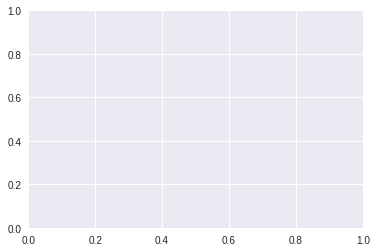

In [64]:
colors = np.random.rand(100)

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [71]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [72]:
Counter(db.labels_)

Counter({-1: 200000})

In [69]:
t_train_data[db.labels_>=0]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [28]:
import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.clf()

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    for index in class_members:
        x = t_train_data[index]
        if index in core_samples and k != -1:
            markersize = 14
        else:
            markersize = 6
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=markersize)

pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>